# Energétique & Entrepreneuriat Vert - Data Project
## CSR Practices in listed companies

# Part 1 - Setup & Data Cleaning

## Setup

**Energy Sector** : 
Focuses on exploring, producing, refining, marketing, and more of fossil fuels to produce and distribute energy	

**Utilities Sector** : 
Focuses on providing water, electricity, and other public utilities services to consumers and businesses 

In [405]:
# Imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_theme()
sns.set_context('paper')

import warnings
warnings.filterwarnings("ignore")

## Data Cleaning

In [11]:
#Load data
df = pd.read_excel('data_dec_csr.xlsx')

In [13]:
df.shape

(486186, 6)

In [14]:
#Drop duplicates
df.drop(df[df['company'] == 'company'].index, inplace=True)
df = df.drop_duplicates(subset=['company', 'country', 'variable', 'year', 'sector'])
df.shape

(451865, 6)

In [15]:
df_copy = df.copy(deep=True)

In [18]:
#Unstack data to pivot variables to columns format
df = df.set_index(['year', 'country', 'sector', 'company', 'variable'])['value'].unstack()

In [19]:
df

variable                                                             carbon_offsets  \
year country                  sector          company                                 
2007 Australia                Industrials     Qantas Airways Ltd                NaN   
     Austria                  Basic Materials Lenzing AG                        NaN   
                                              Mayr Melnhof Karton AG            NaN   
                                              RHI Magnesita NV                  NaN   
                                              Wienerberger AG                   NaN   
...                                                                             ...   
2021 United States of America Utilities       UGI Corp                          NaN   
                                              Unitil Corp                       NaN   
                                              Vistra Corp                       NaN   
                                              WEC Energy Group Inc              NaN   
                                              Xcel Energy Inc              19336894   

variable                                                             co2e_scope1  \
year country                  sector          company                              
2007 Australia                Industrials     Qantas Airways Ltd        11200000   
     Austria                  Basic Materials Lenzing AG                     NaN   
                                              Mayr Melnhof Karton AG         NaN   
                                              RHI Magnesita NV               NaN   
                                              Wienerberger AG                NaN   
...                                                                          ...   
2021 United States of America Utilities       UGI Corp                       NaN   
                                              Unitil Corp                    NaN   
                                              Vistra Corp                    NaN   
                                              WEC Energy Group Inc      18699365   
                                              Xcel Energy Inc           56199475   

variable                                                             co2e_scope2  \
year country                  sector          company                              
2007 Australia                Industrials     Qantas Airways Ltd             NaN   
     Austria                  Basic Materials Lenzing AG                     NaN   
                                              Mayr Melnhof Karton AG         NaN   
                                              RHI Magnesita NV               NaN   
                                              Wienerberger AG                NaN   
...                                                                          ...   
2021 United States of America Utilities       UGI Corp                       NaN   
                                              Unitil Corp                    NaN   
                                              Vistra Corp                    NaN   
                                              WEC Energy Group Inc      18699365   
                                              Xcel Energy Inc           55192251   

variable                                                             co2e_scope3  \
year country                  sector          company                              
2007 Australia                Industrials     Qantas Airways Ltd             NaN   
     Austria                  Basic Materials Lenzing AG                     NaN   
                                              Mayr Melnhof Karton AG         NaN   
                                              RHI Magnesita NV               NaN   
                                              Wienerberger AG                NaN   
...                                                                          ...   
2021 Unite

In [22]:
df.reset_index(level=['year', 'country', 'sector', 'company'], inplace=True)
df

variable,year,country,sector,company,carbon_offsets,co2e_scope1,co2e_scope2,co2e_scope3,co2e_to_revenue,controversies_count,...,resource_target,revenue,sdg11_cities,sdg12_sustainable_consumption,sdg13_climate,sdg7energy,target_emissions,target_energy,total_co2e,total_renewable
0,2007,Australia,Industrials,Qantas Airways Ltd,NaN,11200000,NaN,NaN,1104.66,NaN,...,0,1.27803e+10,NaN,NaN,NaN,NaN,NaN,NaN,11200000,NaN
1,2007,Austria,Basic Materials,Lenzing AG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.39912e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,Austria,Basic Materials,Mayr Melnhof Karton AG,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1.99587e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007,Austria,Basic Materials,RHI Magnesita NV,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1.76271e+09,0,0,0,0,NaN,NaN,NaN,NaN
4,2007,Austria,Basic Materials,Wienerberger AG,NaN,NaN,NaN,NaN,NaN,NaN,...,0,2.93614e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31998,2021,United States of America,Utilities,UGI Corp,NaN,NaN,NaN,NaN,0,0,...,True,7447000000,NaN,NaN,NaN,NaN,0,0,NaN,NaN
31999,2021,United States of America,Utilities,Unitil Corp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,418600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32000,2021,United States of America,Utilities,Vistra Corp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11443000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32001,2021,United States of America,Utilities,WEC Energy Group Inc,NaN,18699365,18699365,0,True,0,...,True,7241700000,NaN,NaN,NaN,NaN,True,0,4559.82,NaN


In [27]:
df = df_copy
df_copy = df.copy(deep=True)

In [23]:
#Dropna
df.dropna(subset=['company'], inplace=True)
df.shape

(31959, 35)

In [24]:
#We have 15 years history
len(df['year'].unique())

15

In [26]:
#We have 11 sectors
len(df['sector'].unique())

11

In [37]:
#Class columns into desired types
columns = df.columns.to_list()
cols_num = ['year',
 'carbon_offsets',
 'co2e_scope1',
 'co2e_scope2',
 'co2e_scope3',
 'co2e_to_revenue',
 'controversies_count',
 'emissions_target_percent',
 'emissions_target_year',
 'energy_use',
 'est_co2e',
 'mkt_cap',
  'renewable_to_energy',
 'reporting_scope',
 'revenue',
  'total_co2e',
 'total_renewable'
 ]
cols_cat = ['environment_score','emissions_score']
cols_bool = [
 'csr_committee',
 'csr_reporting',
 'green_buildings',
 'policy_emissions',
 'policy_energy',
 'renewable',
 'resource_target',
 'sdg11_cities',
 'sdg12_sustainable_consumption',
 'sdg13_climate',
 'sdg7energy',
 'target_emissions',
 'target_energy',
]

In [40]:
#Fill nan an transform data types
df[cols_bool] = df[cols_bool].fillna(False).astype(bool)
df[cols_cat] = df[cols_cat].fillna('Unknown').astype('category')
df[cols_num] = df[cols_num].fillna(0).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31959 entries, 0 to 32002
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   year                           31959 non-null  float64 
 1   country                        31959 non-null  object  
 2   sector                         31959 non-null  object  
 3   company                        31959 non-null  object  
 4   carbon_offsets                 31959 non-null  float64 
 5   co2e_scope1                    31959 non-null  float64 
 6   co2e_scope2                    31959 non-null  float64 
 7   co2e_scope3                    31959 non-null  float64 
 8   co2e_to_revenue                31959 non-null  float64 
 9   controversies_count            31959 non-null  float64 
 10  csr_committee                  31959 non-null  bool    
 11  csr_reporting                  31959 non-null  bool    
 12  emissions_score                3

In [106]:
# Sector count (approx. number of unique companies)
df.sector.value_counts() / len(set(df.year))

Industrials                        375.533333
Financials                         350.866667
Basic Materials                    310.600000
Technology                         274.666667
Energy                             227.066667
Consumer Non-Cyclicals             210.000000
Healthcare                         201.866667
Utilities                          138.600000
Consumer Cyclicals                  34.600000
Real Estate                          5.866667
Academic & Educational Services      0.933333
Name: sector, dtype: float64

In [107]:
#Drop real estate and educational services
df.drop(df[df['sector'] == 'Academic & Educational Services'].index, inplace=True)
df.drop(df[df['sector'] == 'Real Estate'].index, inplace=True)
df.sector.value_counts(normalize=True)

Industrials               0.176821
Financials                0.165207
Basic Materials           0.146247
Technology                0.129328
Energy                    0.106915
Consumer Non-Cyclicals    0.098879
Healthcare                0.095050
Utilities                 0.065260
Consumer Cyclicals        0.016292
Name: sector, dtype: float64

# Part 2 - Descriptive Analysis

## Macro view

We have 2406 companies in our dataset (~5% of total listed companies in the world, according to [Statista](https://www.statista.com/statistics/1259025/global-listed-companies/#:~:text=As%20of%202019%2C%20there%20were,14.5%20thousand%20companies%20listed%20worldwide.)).

In [921]:
len(df.company.unique())

2406

### $CO2_e$, Energy & Revenue

We can first keep only companies that disclosed $CO_2e$ emissions and energy use for the period 2007 - 2021, groupby year to get the macro trend and observe again relations between Energy, $CO_2e$ and Revenue.

In [1010]:
dco2e = df[(df['total_co2e'] > 0) & (df['energy_use'] > 0)].groupby('year').sum()

First, $CO_2e$ and Energy :

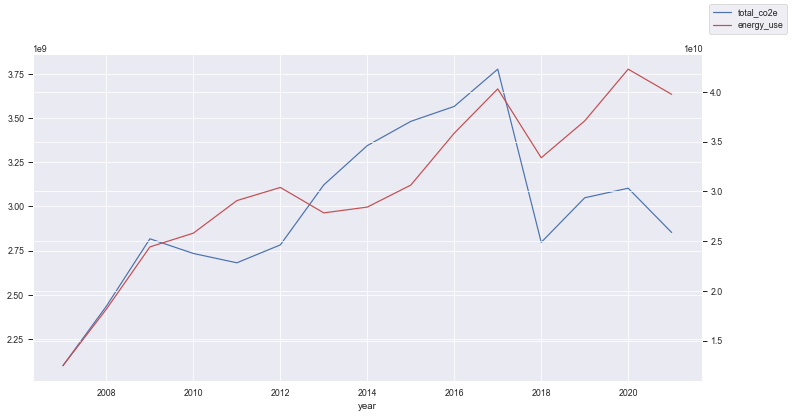

In [1006]:
plt.figure(figsize=(12,6))
ax = dco2e.plot(y = "total_co2e", legend = False)
ax2 = ax.twinx()
dco2e.plot(y = "energy_use", ax = ax2, legend = False, color = "r")
ax.figure.legend()
plt.show()

There is a visible cotrend, but there are dispersions and gaps, probably partly due to discolsing methodologies, emissions calculations, etc. 

Another hypothesis is the increasing number of companies that disclosed $CO_2e$ $Scope_3$ (which is not included in `energy_use` calculation) that create a boom in `total_co2e` ( since $\sum CO_2e = Scope_1 + Scope_2 + Scope_3$ ).

Note that we see a drop in 2018 and further. I am almost sure that it is related to an error in prior steps, possibly the data exportation and/or data cleaning. Therefore, we will drop this period later.

We can add a new column, CO2eS1_2, equal to $Scope_1 + Scope_2$ and visualise again the trend:

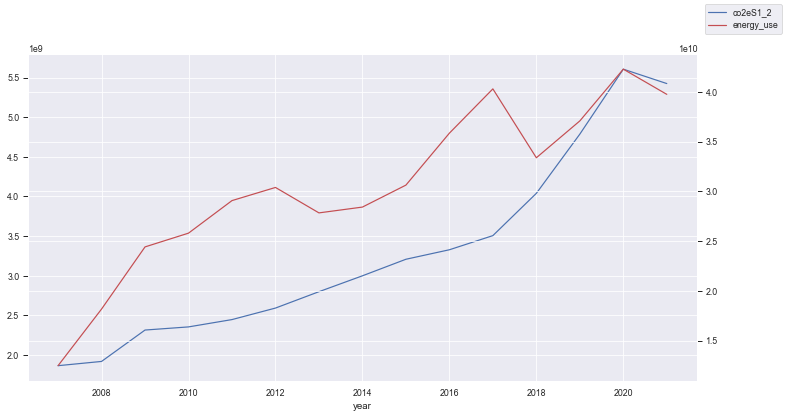

In [1025]:
#Create the new col
dco2e['co2eS1_2'] = dco2e['co2e_scope1'] + dco2e['co2e_scope2']

#Plot
plt.figure(figsize=(12,6))
ax = dco2e.plot(y = "co2eS1_2", legend = False)
ax2 = ax.twinx()
dco2e.plot(y = "energy_use", ax = ax2, legend = False, color = "r")
ax.figure.legend()
plt.show()

Evolution is more similar. Also, we interestingly observe that the area between the two lines is decreasing over time.

Then, $CO_2e$ and Revenue:

<Figure size 864x432 with 0 Axes>

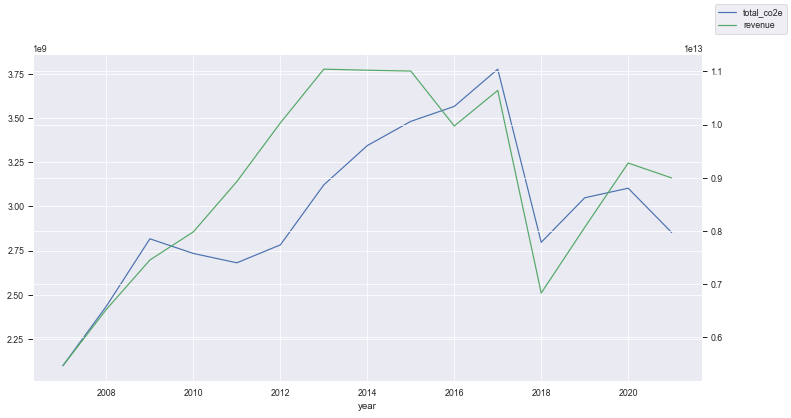

In [1011]:
#Plot
plt.figure(figsize=(12,6))
ax = dco2e.plot(y = "total_co2e", legend = False)
ax2 = ax.twinx()
dco2e.plot(y = "revenue", ax = ax2, legend = False, color = "g")
ax.figure.legend()
plt.show()

We see again a strong relation, except for the period ~2010-2015.

Lastly, Energy Use and Revenue:

<Figure size 864x432 with 0 Axes>

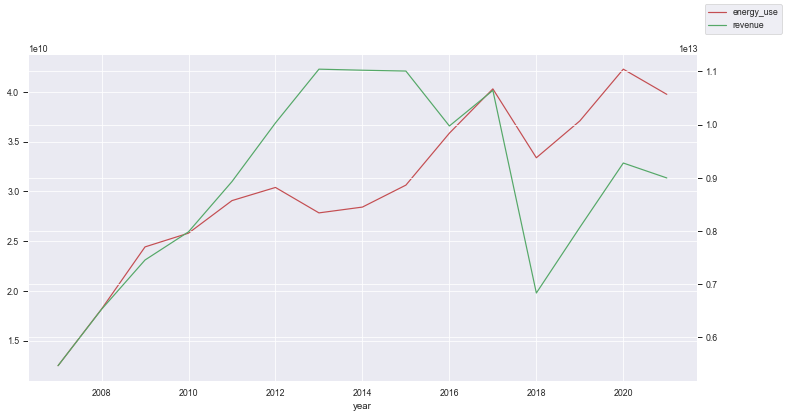

In [1016]:
#Plot
plt.figure(figsize=(12,6))
ax = dco2e.plot(y = "energy_use", legend = False, color='r')
ax2 = ax.twinx()
dco2e.plot(y = "revenue", ax = ax2, legend = False, color = "g")
ax.figure.legend()
plt.show()

Again, the period 2010 - 2015 fail.

We can plot correlations:

In [1027]:
def plot_correlations(df, s=(25,15)):
    corr_matrix = df.corr()
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True
    plt.figure(figsize=s)
    heatmap = sns.heatmap(corr_matrix,vmin=-1, vmax=1, annot=True, cmap='RdBu', mask=mask)
    heatmap.set_title("Correlation Heatmap")

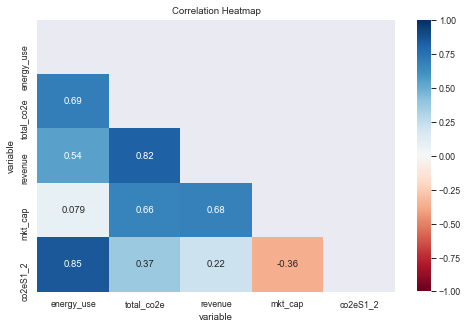

In [1023]:
plot_correlations(dco2e[['energy_use', 'total_co2e', 'revenue', 'mkt_cap', 'co2eS1_2']], s=(8,5))

With energy_use, $Scope_1 + Scope_2$ is indeed more correlated ( $r = 0.85$ ) than $\sum CO_2e$ ( $r = 0.69$ ). Revenue appears also to have a strong correlation with $\sum CO_2e$ ( $r = 0.82$ ). Finally, it is interesting to see that market capitalization is absolutely not correlated with the quantity of used energy ( $r = 0.08$ ).

### Global trends

We can now visualize global trends of our sample per year. I will drop years 2018-2021.

In [916]:
dy = df.groupby('year').sum()
dy = dy.drop([2018, 2019, 2020, 2021])

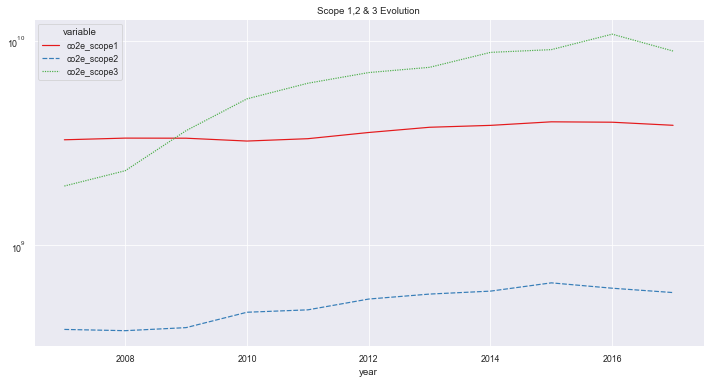

In [912]:
plt.figure(figsize=(12,6))
sns.lineplot(data=dy[['co2e_scope1', 'co2e_scope2', 'co2e_scope3']], palette='Set1')
plt.title('Scope 1,2 & 3 Evolution')
plt.yscale('log')

Our data fit at least a little the litterature since $Scope_3$ is the most important scope since ~2009 and is increasing (really) faster than others scopes, which is probably again due to the increasing number of disclosing companies.

We can then visualise some boolean variables. The sum count all "True" entries, therefore for each bool variable, we have the proportion $[0,1]$ of total companies with True.

Please recall that the dataset contains mainly companies that published a CSR Report at least one time  $[2017, ..., 2021]$ . Thus, it is normal to see that almost all companies in this dataset published a CSR report in 2017. 

The real number, *according to some other exportations I've made from Refinitiv*, is more somewhere between 10% and 20% in the period  $2019, 2020, 2021$.

Therefore, our topic of interest here is to see that given all those companies that recently published a CSR Report, what is the proportion with emissions targets, policies to reduce energy use, etc. 

**First, a global trend:**

<AxesSubplot:xlabel='year'>

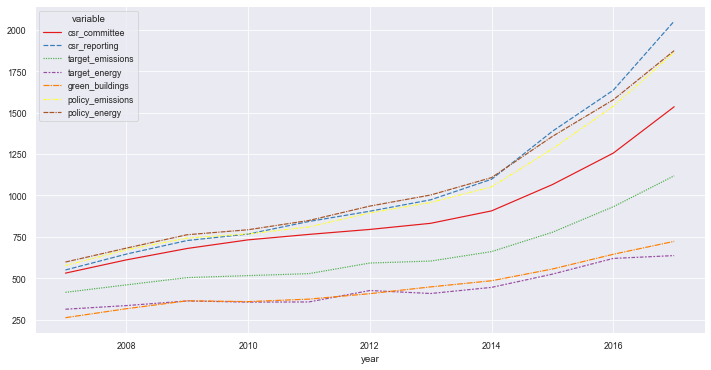

In [924]:
plt.figure(figsize=(12,6))
sns.lineplot(data=dy[[
    'csr_committee', 
    'csr_reporting',
    'target_emissions', 
    'target_energy',
    'green_buildings',
    'policy_emissions', 
    'policy_energy',
    ]], palette='Set1')

The first notable thing is the increasing number of companies with ESG-related information disclosing. All the selected variables increase, but not at the same speed. We roughly observe two periods: before 2014 and after. It could partly be due to the Paris COP and the legislation in EU. 
The number of companies that published a CSR Report has been multiplied by a factor 2 between 2007 and 2014, and again a factor 2 between 2014 and 2017.

An interesting fact is that while the number of companies that published a CSR report increased fastly to reach 100% (due to the dataset nature), the presence of the CSR committee is growing much slowly. In 2007, ~20% of the companies published a CSR Report and had a CSR Committee. In 2017, there is a notable gap : ~2200 companies published a CSR Report (~92%), but ~1550 only had a CSR Committee.

Another notable observation: Almost all companies that published a CSR Report claimed to have a policy to reduce $CO_2e$ emissions and Energy use. However, a much lower proportion have setted a target.

**We can zoom on Emissions Policies & Targets:**

<AxesSubplot:xlabel='year'>

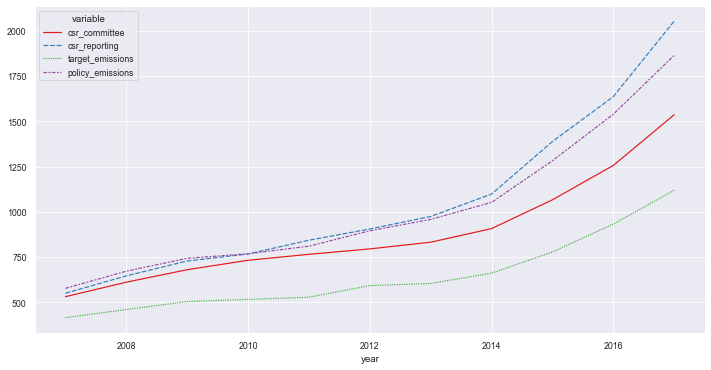

In [925]:
plt.figure(figsize=(12,6))
sns.lineplot(data=dy[[
    'csr_committee', 
    'csr_reporting',
    'target_emissions', 
    'policy_emissions', 
    ]], palette='Set1')

We see more clearly the gap between `target_emissions` and `policy_emissions`. We can compute, for each year, the relative difference between policies and targets :

Text(0.5, 1.0, 'Difference between companies with reduction policy and target')

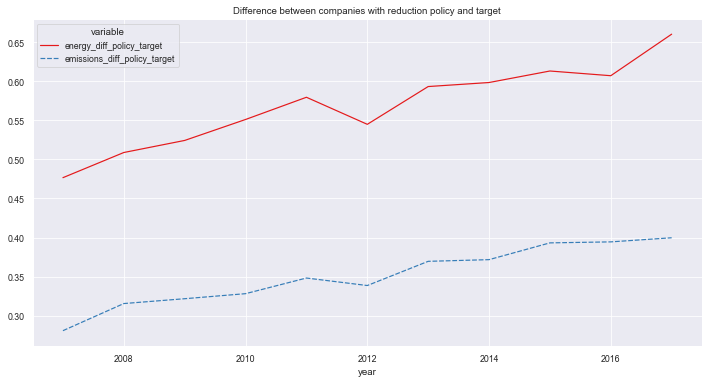

In [930]:
#Compute difference
dy['emissions_diff_policy_target'] = abs(( dy['target_emissions'] - dy['policy_emissions'] ) / dy['policy_emissions'])
dy['energy_diff_policy_target'] = abs(( dy['target_energy'] - dy['policy_energy'] ) / dy['policy_energy'])

plt.figure(figsize=(12,6))
sns.lineplot(data=dy[[
'energy_diff_policy_target',
'emissions_diff_policy_target' 
    ]], palette='Set1')
plt.title('Difference between companies with reduction policy and target')

The highest difference is between energy policies & energy targets (~47% in 2007 to ~66% in 2017). There is also a very notable difference between emissions policies & targets : ~25% in 2007 to ~40% in 2017. The gap tends to get bigger over the years.

A personal intuition (*not verified*) is the increase in stakeholders (consumers, investors, public...) pressure on companies to publish ESG information and commit to the environmental pillar, which leads to an increase in the proportion of commitments without leading to "serious" (quantified for example) commitments via a target setting-up. 

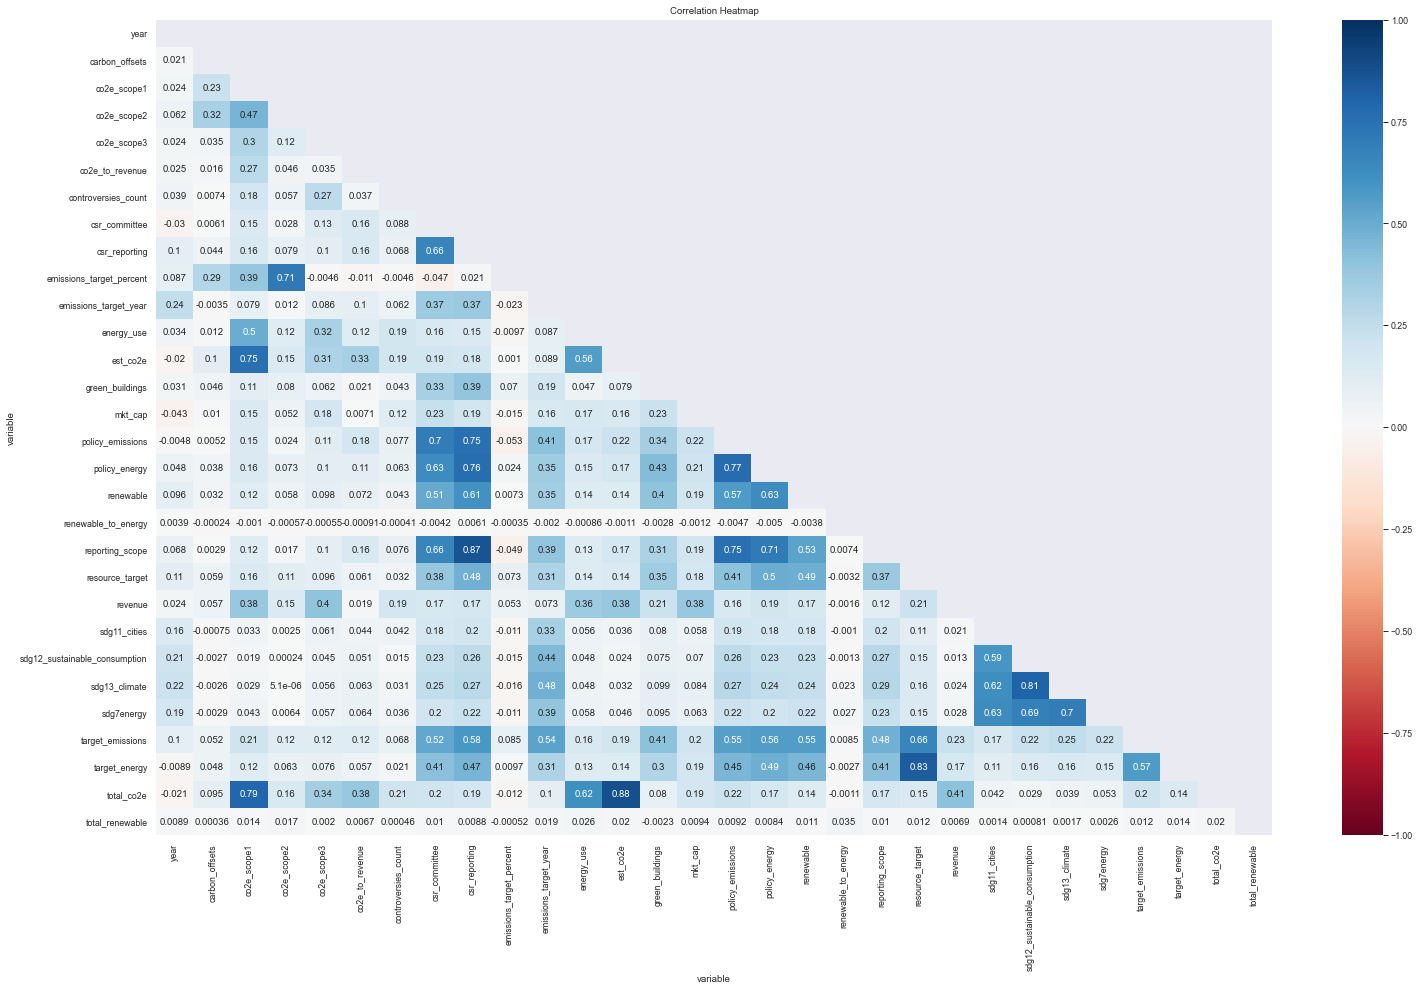

In [995]:
plot_correlations(df)

## Environmental Policies & CSR Practices - Sector analysis

We are now moving to a higher level of granularity by analyzing the data by economic sector. We use the [GICS Taxonomy](https://en.wikipedia.org/wiki/Global_Industry_Classification_Standard), mostly suited for the financial community. To get a reasonable number of sectors, we use the Economic Sector taxonomy, with 11 sectors.

I will first create a new dataframe with only boolean variables grouped by year and by sector. For each sector, for each year, I compute the relative proportion of True. For example,  `csr_committee` $= 0.13$ for Basic Materials in 2007 means that in 2007, 13% of companies in the sector Basic Materials had a CSR Committee. We can thus observe trends per sectors over years.

In [956]:
#Get percentage of "True" for bool variables, for each sector/year
cols_bool_info = cols_bool + ['year', 'sector']
bool_sectors = df[cols_bool_info].groupby(['year', 'sector']).agg(lambda x: x.sum() / x.count()).reset_index()
bool_sectors

variable,year,sector,csr_committee,csr_reporting,green_buildings,policy_emissions,policy_energy,renewable,resource_target,sdg11_cities,sdg12_sustainable_consumption,sdg13_climate,sdg7energy,target_emissions,target_energy
0,2007.0,Basic Materials,0.130597,0.108209,0.007463,0.130597,0.134328,0.108209,0.100746,0.000000,0.000000,0.000000,0.000000,0.119403,0.078358
1,2007.0,Consumer Cyclicals,0.272727,0.363636,0.181818,0.393939,0.333333,0.181818,0.242424,0.000000,0.000000,0.000000,0.000000,0.212121,0.242424
2,2007.0,Consumer Non-Cyclicals,0.401070,0.433155,0.213904,0.438503,0.459893,0.320856,0.352941,0.000000,0.000000,0.000000,0.000000,0.336898,0.310160
3,2007.0,Energy,0.102564,0.092308,0.020513,0.169231,0.123077,0.056410,0.076923,0.000000,0.000000,0.000000,0.000000,0.123077,0.076923
4,2007.0,Financials,0.397516,0.385093,0.273292,0.360248,0.447205,0.251553,0.183230,0.000000,0.000000,0.000000,0.000000,0.245342,0.180124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2021.0,Financials,0.000000,0.357367,0.228840,0.000000,0.213166,0.269592,0.413793,0.000000,0.000000,0.000000,0.009404,0.338558,0.075235
131,2021.0,Healthcare,0.000000,0.210046,0.164384,0.000000,0.164384,0.173516,0.237443,0.000000,0.000000,0.000000,0.009132,0.200913,0.077626
132,2021.0,Industrials,0.253012,0.658635,0.329317,0.321285,0.526104,0.465863,0.526104,0.112450,0.120482,0.156627,0.096386,0.630522,0.172691
133,2021.0,Technology,0.003367,0.144781,0.107744,0.003367,0.117845,0.124579,0.181818,0.003367,0.000000,0.003367,0.023569,0.185185,0.050505


In [957]:
#Drop years > 2017
bool_sectors.drop(bool_sectors[bool_sectors['year'] > 2017].index, inplace=True)

**First, a quick view per variable:**

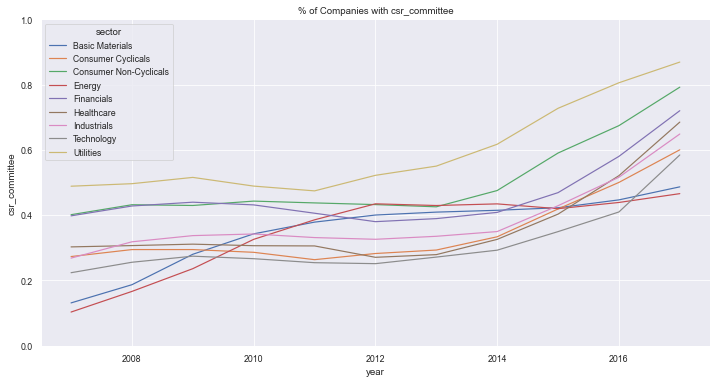

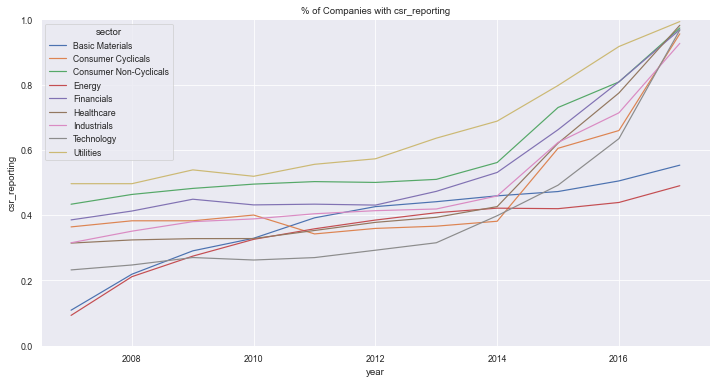

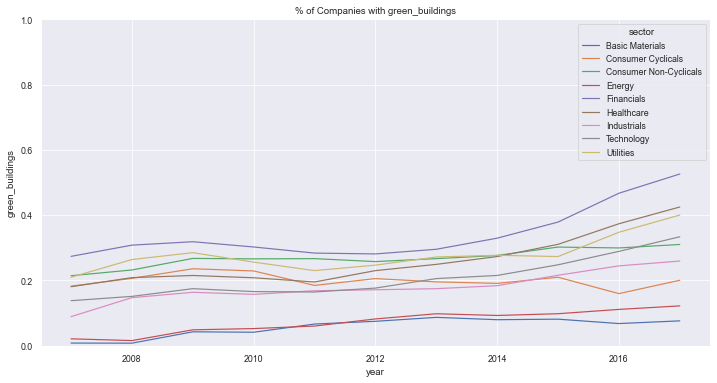

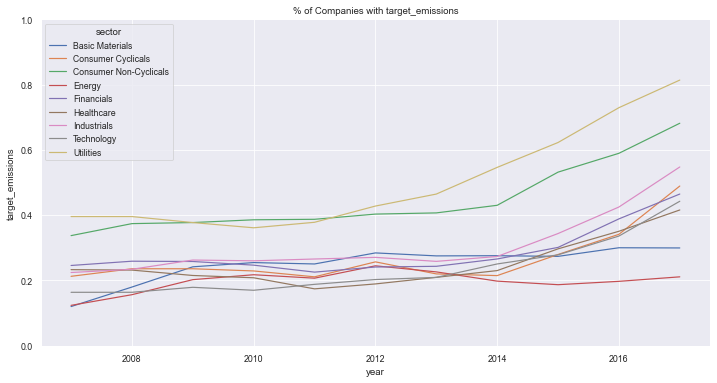

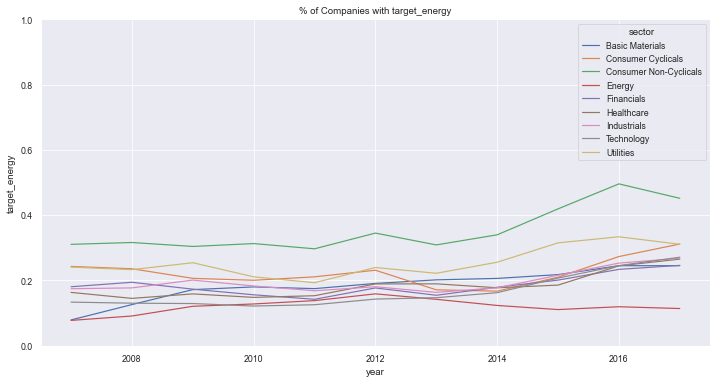

In [958]:
#Draw evolution per sector for each bool variable 
for v in ['csr_committee',
 'csr_reporting',
 'green_buildings',
 'target_emissions',
 'target_energy']:
 
    plt.figure(figsize=(12,6))
    sns.lineplot(data=bool_sectors, y=v, hue='sector', x='year')
    plt.ylim(0,1)
    plt.title(f'% of Companies with {v}')

A few observations:
- Utilies sector is higher for emissions targets and CSR Reporting
- However, Consumer Non-Cyclicals has more companies with an energy target.
- Energy & Basic Materials sectors are slow to set targets and publish CSR information.
- Financials have more green buildings!

In [ ]:
for v in ['csr_committee',
 'csr_reporting',
 'green_buildings',
 'target_emissions',
 'target_energy']:
 
    plt.figure(figsize=(12,6))
    sns.lineplot(data=bool_sectors, y=v, hue='sector', x='year')
    plt.ylim(0,1)
    plt.title(f'% of Companies with {v}')

## CO2e Targets in 2017

We will now keep data only for the 2017 year (since it is the most recent year with decent data we have at our disposal) and have a closer look to $CO_2e$ emissions commitments of companies. 

In [117]:
df_2017 = df.loc[df['year'] == 2017]

**First, emissions reduction target in % :**

We can first have a look at the distribution for `emissions_target_percent`, which represents the percentage of emissions reduction announced by companies. 

Note that the missing data was previously replaced by 0, I will keep it here, because I make the assumption that a missing data reflects a engagement of 0% reduction (it is obvioulsy discutable).

Also, we do not know if the target is [absolute](https://blog.adecesg.com/blog/absolute-vs-intensity-how-are-you-setting-science-based-targets) (i.e., an absolute reduction of $\sum CO2_e$ , [often on Scope_1, Scope_2](https://www.mckinsey.com/business-functions/strategy-and-corporate-finance/our-insights/on-target-how-to-succeed-with-carbon-reduction-initiatives) ) or [relative](https://blog.adecesg.com/blog/absolute-vs-intensity-how-are-you-setting-science-based-targets) (i.e., $ \frac{\sum CO2_e}{metric}$, where the metric can be anything, often revenue, ebitda, employees or even market capitalization).

(-10.0, 110.0)

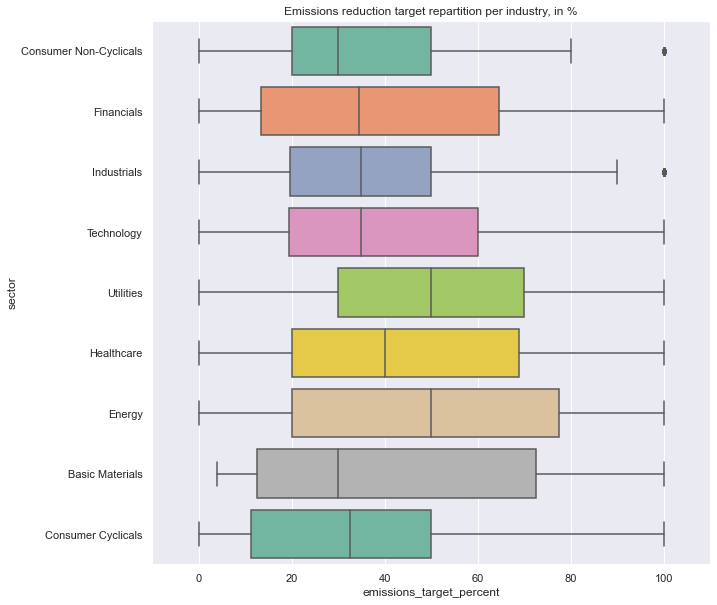

In [246]:
#Boxplot
plt.figure(figsize=(10,10))
sns.boxplot(
    data=df_2017, y='sector', 
    x='emissions_target_percent', palette='Set2'
    )
plt.title('Emissions reduction target repartition per industry, in %')
plt.xlim(-10,110)

Most ambitious sectors are Utilities & Energy (median close to 50%), which appears to be a good news because there are among the highest emitters. However, the Energy sector is the most heterogeneous as well. All sectors fall between 0 and 100% reduction, no surprise. 

Basic Materials is the sector with the lowest median. Industrials sector has a very narrow distribution, most companies are engaged towards a ~20% to 50% reduction.

**Then, year targets:**

In [ ]:
df_2017.drop(df_2017[df_2017['emissions_target_year'] < 2015].index, inplace=True)

Text(0.5, 1.0, 'Emissions reduction target year objective repartition per industry')

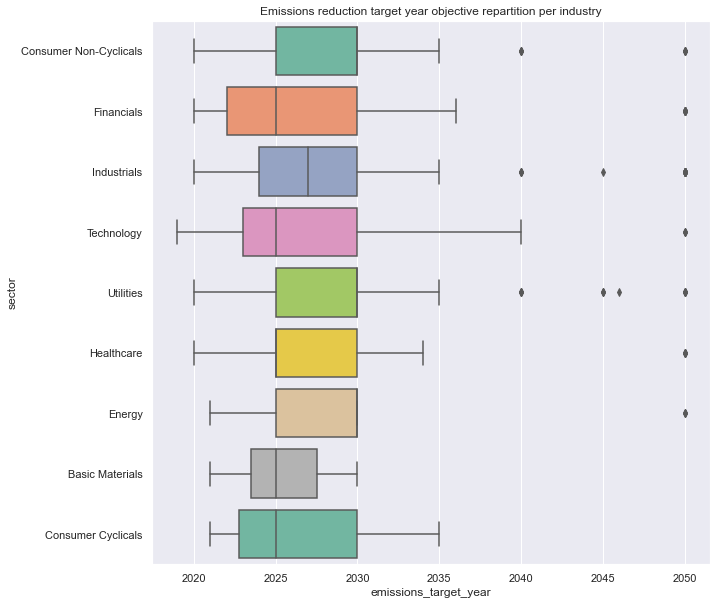

In [248]:
plt.figure(figsize=(10,10))
sns.boxplot(
    data=df_2017, y='sector', 
    x='emissions_target_year', palette='Set2'
    )
plt.title('Emissions reduction target year objective repartition per industry')

Most of companies, in every sector, have made short term to medium term commitments : between 2025 and 2030.

[A recent McKinsey study](https://www.mckinsey.com/business-functions/strategy-and-corporate-finance/our-insights/on-target-how-to-succeed-with-carbon-reduction-initiatives) show that most companies (44%) are focused on short-term targets, i.e. before 2025, while 27% are focused on medium term target (2026-2040), 2% on long term targets (2041-2050). The remaining companies have setted targets accross all three-time horizons. 

We do not have multiple target years here but we can still look at the distribution and observe if we see similar values:

<AxesSubplot:xlabel='emissions_target_year', ylabel='Probability'>

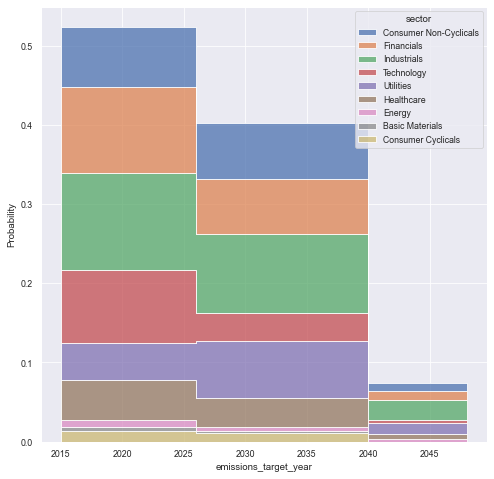

In [1035]:
plt.figure(figsize=(8,8))
sns.histplot(data=df_2017, x='emissions_target_year', 
bins=[2015,2026,2040,2050], 
hue='sector', multiple='stack', element='step', stat='probability',
common_norm=True, shrink=.8)

We see indeed that most companies (~55%) are focused on short-term horizons, then ~40% on medium-term and the remaining ~5% on long-term goals.

**Finally, a global distribution between % and year:**

<AxesSubplot:xlabel='emissions_target_year', ylabel='emissions_target_percent'>

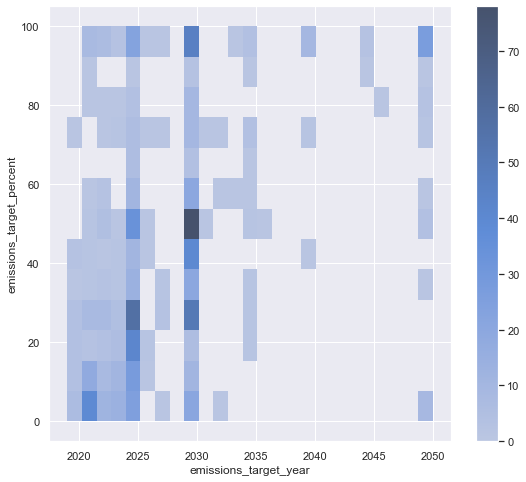

In [195]:
plt.figure(figsize=(9,8))
sns.histplot(data=df_2017, x='emissions_target_year', y='emissions_target_percent', palette='Set2', cbar=True)

The most common target is 50% in 2030. We observe a notable number of companies towards carbon neutrality in 2030 as well, annd most companies focused on long term are engaged towards carbon neutrality. Common objectives are also 25-30% by 2025 to 2030. 

I did not compare here targets with actual performances, and with the SBTi framework to meet Paris Agreements towards 1.5°C. But again, we do not know if targets are relative or absolute. While relative targets might be a good indicator to observe carbon intensity, absolute targets are harder to reach in case of economic growth. At the end and from a macro view, we need an absolute reduction of our $CO_2e$ emissions.

## Companies engaged towards carbon neutrality - 2017

We can have a closer look on companies that are engaged towards carbon neutrality !

In [253]:
engaged_companies = df_2017.loc[df_2017['emissions_target_percent'] >= 100]
engaged_companies.head(3)

variable,year,country,sector,company,carbon_offsets,co2e_scope1,co2e_scope2,co2e_scope3,co2e_to_revenue,controversies_count,...,resource_target,revenue,sdg11_cities,sdg12_sustainable_consumption,sdg13_climate,sdg7energy,target_emissions,target_energy,total_co2e,total_renewable
21486,2017.0,Austria,Consumer Non-Cyclicals,Agrana Beteiligungs AG,0.0,0.000,0.000,0.000,238.915265,0.0,...,True,2.708560e+09,False,True,True,True,True,True,734717.000,0.0
21524,2017.0,Belgium,Healthcare,AGFA Gevaert NV,0.0,90900.000,53700.000,0.000,69.279361,0.0,...,False,2.667157e+09,False,True,True,False,True,False,144600.000,0.0
21528,2017.0,Belgium,Healthcare,Ion Beam Applications SA,0.0,6390.368,3025.743,109807.889,24.714809,0.0,...,False,3.456413e+08,False,False,False,False,True,False,9416.111,0.0


**How many companies?**

In [1037]:
print(f'Companies engaged towards carbon neutrality, 2017 : {engaged_companies.shape[0]}')
print(f'Companies engaged towards carbon neutrality in % of the dataset : {round(engaged_companies.shape[0] / len(df.company.unique()),2)}')

Companies engaged towards carbon neutrality, 2017 : 133
Companies engaged towards carbon neutrality in % of the dataset : 0.06


**Market Cap ?**

<AxesSubplot:xlabel='mkt_cap', ylabel='Count'>

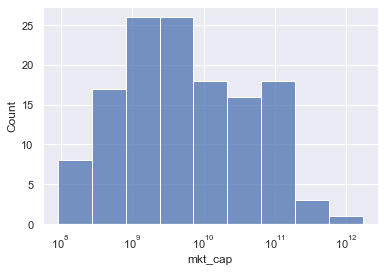

In [202]:
sns.histplot(engaged_companies.mkt_cap, log_scale=True)

**Year?**

<AxesSubplot:xlabel='emissions_target_year', ylabel='Count'>

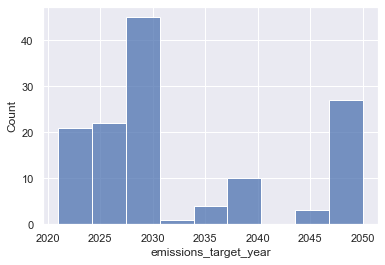

In [207]:
sns.histplot(engaged_companies.emissions_target_year)

**Are those companies disclosing their $CO_2e$ emissions ?**

In [215]:
total_co2 = engaged_companies[engaged_companies['total_co2e'] > 0]['company'].count() / engaged_companies.shape[0]
scope1 = engaged_companies[engaged_companies['co2e_scope1'] > 0]['company'].count() / engaged_companies.shape[0]
scope2 = engaged_companies[engaged_companies['co2e_scope2'] > 0]['company'].count() / engaged_companies.shape[0]
scope3 = engaged_companies[engaged_companies['co2e_scope3'] > 0]['company'].count() / engaged_companies.shape[0]

print(f'Companies engaged to neutral with co2e discolsing: {round(total_co2*100, 2)}%')
print(f'Companies engaged to neutral with co2e scope 1 disclosing: {round(scope1*100, 2)}%')
print(f'Companies engaged to neutral with co2e scope 2 disclosing: {round(scope2*100, 2)}%')
print(f'Companies engaged to neutral with co2e scope 3 disclosing: {round(scope3*100, 2)}%')

Companies engaged to neutral with co2e discolsing: 94.74%
Companies engaged to neutral with co2e scope 1 disclosing: 88.72%
Companies engaged to neutral with co2e scope 2 disclosing: 88.72%
Companies engaged to neutral with co2e scope 3 disclosing: 67.67%


Fortunately most of companies engaged towards carbon neutrality disclose their emissions. However, the $Scope_3$ is still disclosed by only $2/3$ of the companies.

**What are the most represented Sectors?**

<AxesSubplot:>

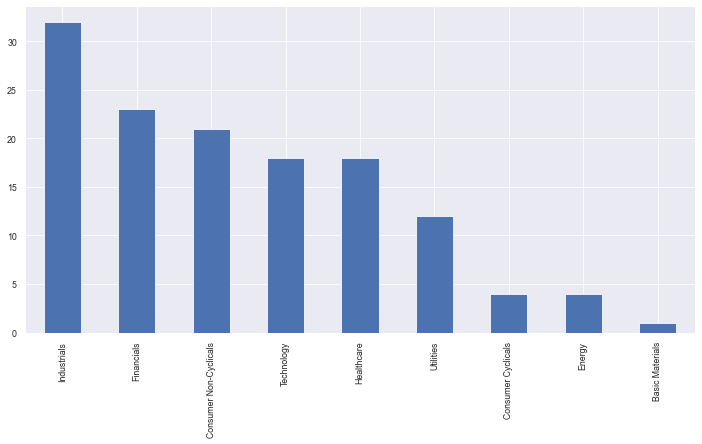

In [1041]:
engaged_companies['sector'].value_counts().nlargest(10).plot(kind='bar')

Interesting to see that Industrials & Financials are the most represented sectors. We find on the other hand only a small number of companies in Energy & Basic Materials, which is coherent with CSR practices per sector obsered earlier in the notebook.

**What are the most represented countries?**

<AxesSubplot:>

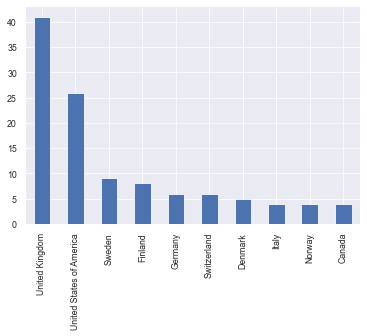

In [961]:
engaged_companies['country'].value_counts().nlargest(10).plot(kind='bar')

Most of the companies have their headquarters in UK and USA. It is probably partly due to the imbalanced nature of the dataset. However, we can note that Sweden and Finland are also well classed.

**How many tonnes are we going to save?**

In [1039]:
mtco2e2030 = sum(engaged_companies[engaged_companies['emissions_target_year'] <= 2030]['total_co2e'])
mtco2e2030 /= 10**6

print(f'MtCO2e less in 2030 : {int(mtco2e2030)}')

mtco2e2050 = sum(engaged_companies[engaged_companies['emissions_target_year'] <= 2050]['total_co2e'])
mtco2e2050 /= 10**6

print(f'MtCO2e less in 2050 : {int(mtco2e2050)}')

MtCO2e less in 2030 : 26
MtCO2e less in 2050 : 121


## Companies engaged towards carbon neutrality - historic

We can now observe the evolution of those companies.

In [244]:
df_engaged = df[df['company'].isin(list(set(engaged_companies['company'])))]
df_engaged.shape

(1772, 35)

In [975]:
engaged_by_years = df_engaged.groupby('year').sum()
engaged_by_years = engaged_by_years.drop([2018, 2019, 2020, 2021])

**First, the evolution of $CO_2e$ emissions:**

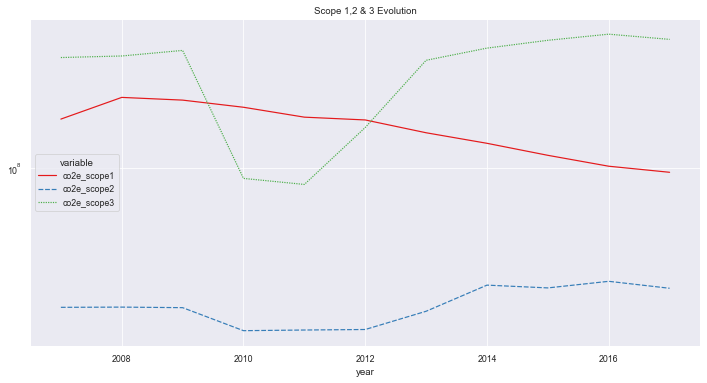

In [976]:
plt.figure(figsize=(12,6))
sns.lineplot(data=engaged_by_years[['co2e_scope1', 'co2e_scope2', 'co2e_scope3']], palette='Set1')
plt.title('Scope 1,2 & 3 Evolution')
plt.yscale('log')

The dip observed for scope 3 is probably due to missing data. We can see that scope 1 follows a downtrend !

**Now, CSR policies & practices:**

<AxesSubplot:xlabel='year'>

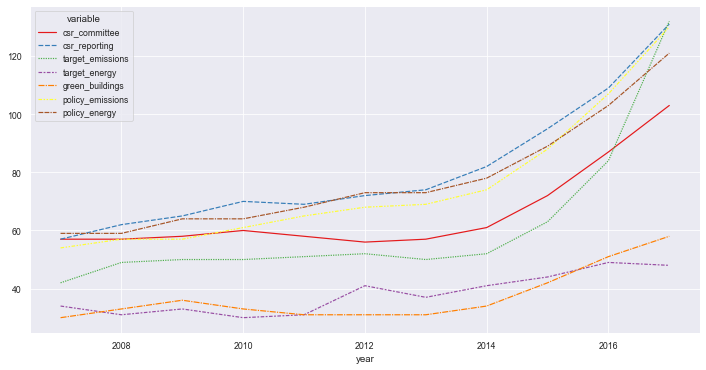

In [978]:
plt.figure(figsize=(12,6))
sns.lineplot(data=engaged_by_years[[
    'csr_committee', 
    'csr_reporting',
    'target_emissions', 
    'target_energy',
    'green_buildings',
    'policy_emissions', 
    'policy_energy',
    ]], palette='Set1')

It is interesting to see that for almost half of those companies, an emission target is very recent.
We also observe that most of the companies (~75%) do not have an energy target setted, they may project to reach carbon neutrality otherwise.
Finally, ~25% of the companies engaged towards carbon neutrality still do not have a CSR Committee.

## Environmental Policies & CSR Practices - Country Analysis

We can quickly look at some trends per country.

In [270]:
#Compute proportion of "True" for selected variables for each year/country
bool_countries = df[cols_bool_info].groupby(['year', 'country']).agg(lambda x: x.sum() / x.count()).reset_index()
bool_countries.shape

(766, 15)

In [281]:
bool_countries.drop(bool_countries[bool_countries['year'] > 2017].index, inplace=True)

In [279]:
#Keep only most represented countries
countries = pd.DataFrame(df['country'].value_counts(normalize=False) / 15).reset_index()
countries_keep = list(countries.loc[countries['country'] > 50]['index'])
bool_countries = bool_countries[bool_countries['country'].isin(countries_keep)]
len(bool_countries.country.unique())

8

We keep only 8 countries for the analysis.

**A quick drawing of the evolution per variable:**

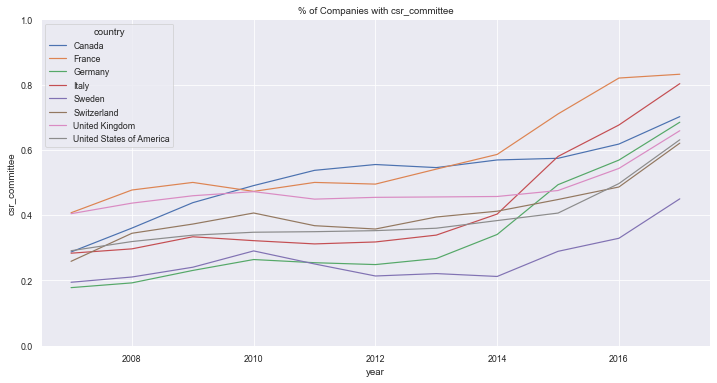

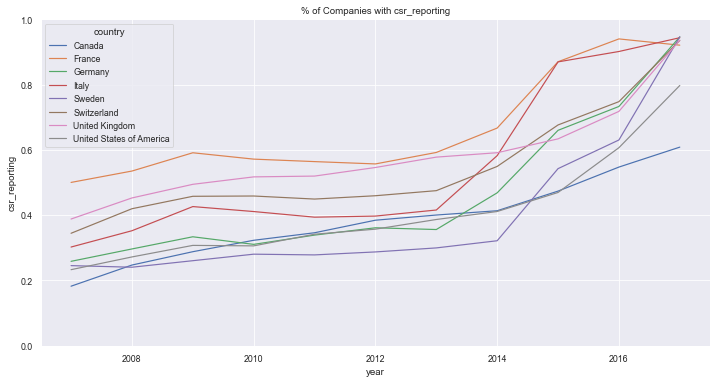

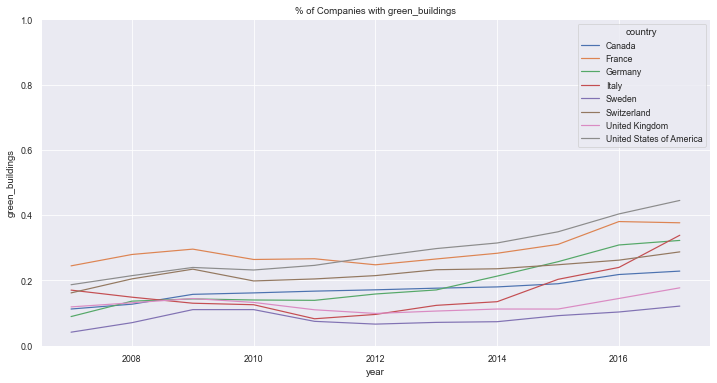

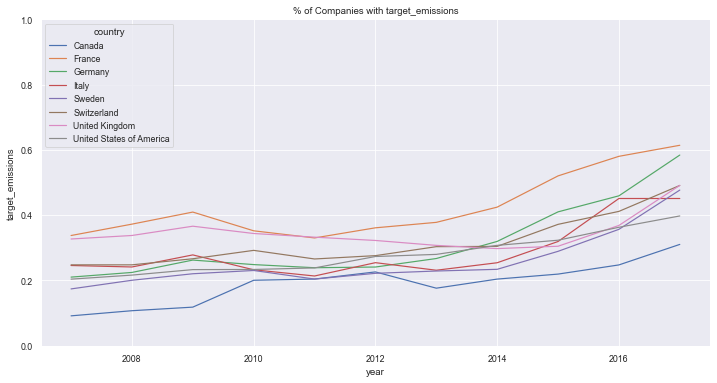

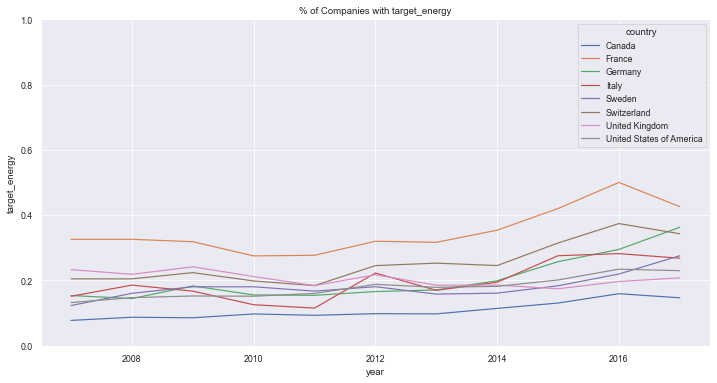

In [992]:
for v in ['csr_committee',
 'csr_reporting',
 'green_buildings',
 'target_emissions',
 'target_energy']:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=bool_countries, y=v, hue='country', x='year')
    plt.ylim(0,1)
    plt.title(f'% of Companies with {v}')

## Carbon Emissions

In this part, we will focus on the emissions of the different sectors. We use revenue to compute $CO_2e$ intensity. 

We first create a new dataframe with carbon-related variables:

In [1061]:
carbon_cols = [
    #Info
    'year',
    'country',
    'sector',
    'company',
    #Carbon
    'carbon_offsets',
    'co2e_scope1',
    'co2e_scope2',
    'co2e_scope3',
    'co2e_to_revenue',
    'target_emissions',
    'total_co2e'
]
df_carbon = df[carbon_cols]
df_carbon.drop(df_carbon[df_carbon['year'] > 2017].index, inplace=True)
df_carbon.head(3)

variable,year,country,sector,company,carbon_offsets,co2e_scope1,co2e_scope2,co2e_scope3,co2e_to_revenue,target_emissions,total_co2e
0,2007.0,Australia,Industrials,Qantas Airways Ltd,0.0,11200000.0,0.0,0.0,1104.656616,False,11200000.0
1,2007.0,Austria,Basic Materials,Lenzing AG,0.0,0.0,0.0,0.0,0.000000,False,0.0
2,2007.0,Austria,Basic Materials,Mayr Melnhof Karton AG,0.0,0.0,0.0,0.0,0.000000,False,0.0


In [1062]:
df_carbon.shape

(23774, 11)

**First, a global view on Emissions Intensity ($\frac{\sum CO2_e}{Revenue}$) VS Total Emissions ($\sum CO2_e$):**

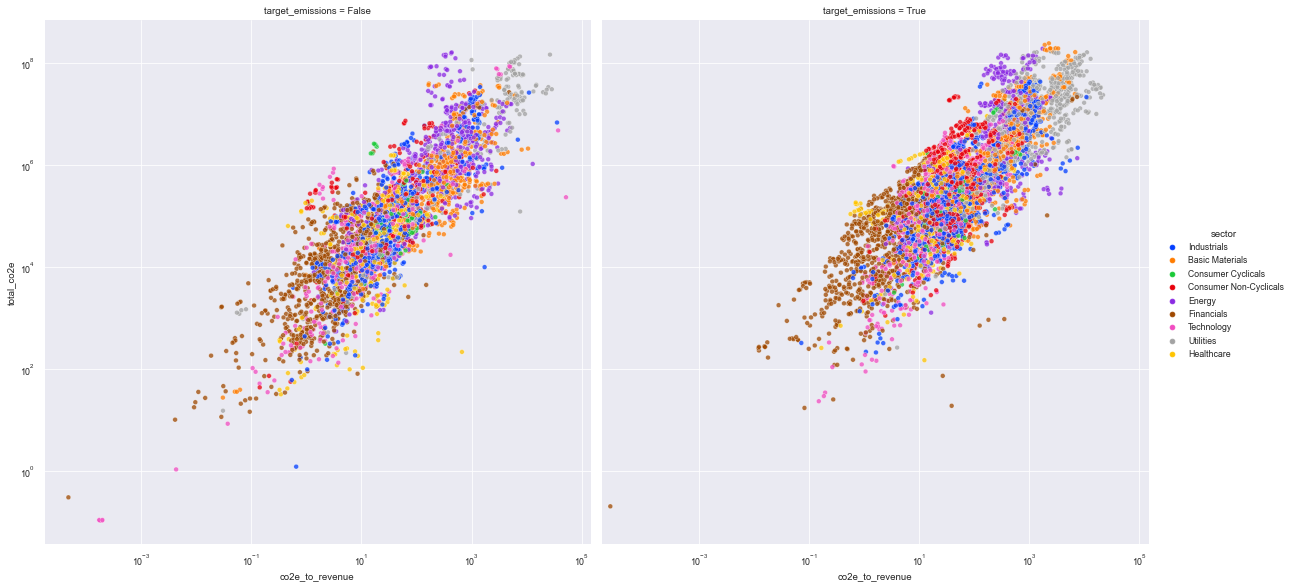

In [1070]:
#Relplot with log scale
sns.relplot(
    data=df_carbon, 
    x='co2e_to_revenue', 
    y='total_co2e', 
    hue='sector',
    alpha=.75,
    col='target_emissions',
    height=8,
    palette='bright')
plt.xscale('log')
plt.yscale('log')

There is a strong linear relation (if we take the log of each variable). We do not see a high difference between companies with target emissions and without. 

We however clearly see that Financials are in the lower part when Utilies in the upper part of the plot. The middle contains more mixed sectors. Industrials and Basic Materialsappears to have companies within the full range.

**We can compute the correlation to measure the similarity:**

In [1087]:
#correlation
r = np.corrcoef(
    np.log(df_carbon_disclosing[df_carbon_disclosing['co2e_to_revenue'] > 0]['total_co2e']), 
    np.log(df_carbon_disclosing[df_carbon_disclosing['co2e_to_revenue'] > 0]['co2e_to_revenue'])
    )[1,0]
round(r,2)

0.83

$r (\log(\sum CO_2e), \log(\frac{\sum CO2_e}{Revenue})) = 0.83$

There is indeed a notable relation between carbon intensity and total emissions.

Now we can only companies that disclose emissions (at least the total) and create a new column, `total_co2e_mkt`, to convert total emissions from tonnes to millions of kilos tonnes ($Mkt$).

In [425]:
df_carbon['total_co2e_mkt'] = df_carbon['total_co2e'] / 10**6
df_carbon_disclosing = df_carbon.loc[df_carbon['total_co2e_mkt'] > 0]

**We can get the number of companies disclosing $CO2_e$ emissions over the years:**

<AxesSubplot:xlabel='year', ylabel='companies'>

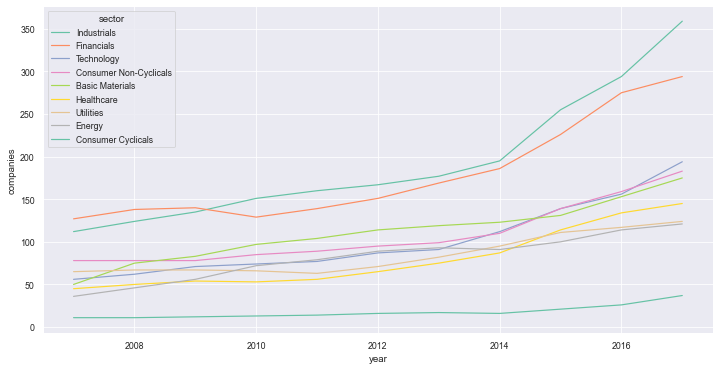

In [426]:
comps =  pd.DataFrame(df_carbon_disclosing[['year', 'sector']].value_counts()).reset_index().rename(columns={0:'companies'})

plt.figure(figsize=(12,6))
sns.lineplot(data=comps, x='year', y='companies', hue='sector', palette='Set2')

Industrials is the most represented sector, followed closely by Financials. We note that it was already the case in 2007 but the gap increased over the years, especially since 2015. Consumer Cyclicals is underepresented but this is due to the dataset which contains only 30 companies.

**Groupby sector & year with mean agg.:**

In [427]:
co2e_sector = df_carbon_disclosing.groupby(['sector', 'year']).mean().reset_index()
co2e_sector

variable,sector,year,carbon_offsets,co2e_scope1,co2e_scope2,co2e_scope3,co2e_to_revenue,total_co2e,total_co2e_mkt
0,Basic Materials,2007.0,0.000000,4.589343e+06,2.694333e+06,1.720000e+04,720.350843,1.004408e+07,10.044080
1,Basic Materials,2008.0,0.000000,4.018660e+06,1.767255e+06,4.502297e+06,557.177622,1.008621e+07,10.086214
2,Basic Materials,2009.0,0.000000,3.574489e+06,1.704582e+06,3.782442e+06,541.942734,9.667554e+06,9.667554
3,Basic Materials,2010.0,10201.185567,5.270898e+06,1.894819e+06,9.790150e+06,607.379724,8.108528e+06,8.108528
4,Basic Materials,2011.0,62978.509615,5.914081e+06,1.835578e+06,1.192464e+07,541.379614,8.297848e+06,8.297848
...,...,...,...,...,...,...,...,...,...
94,Utilities,2013.0,367.340244,1.990412e+07,9.156337e+05,1.400710e+07,2792.835614,2.458273e+07,24.582727
95,Utilities,2014.0,36441.987368,1.906787e+07,1.036000e+06,1.441835e+07,2910.939711,2.242645e+07,22.426450
96,Utilities,2015.0,48726.837838,1.610868e+07,1.043803e+06,1.474901e+07,2633.557109,1.863610e+07,18.636103
97,Utilities,2016.0,101636.632479,1.386330e+07,1.023878e+06,1.499197e+07,2433.265041,1.622284e+07,16.222838


**Now, carbon intensity per sector in 2017:**

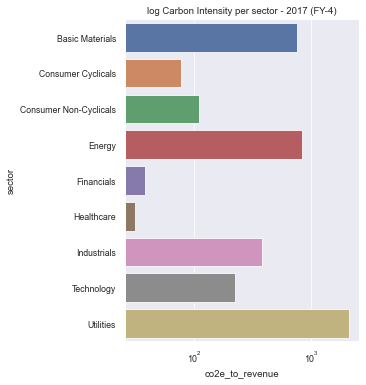

In [429]:
sns.catplot(data=co2e_sector.loc[co2e_sector['year'] == 2017], x='co2e_to_revenue', y='sector', kind='bar')
plt.title('log Carbon Intensity per sector - 2017 (FY-4)')
plt.xscale('log')

Unsurprisingly, we notice that sectors Utilities, Energy and Industrials are the most intensive. Financials and Healthcare are by far the least intensive. 

Particularly for Financials, this probably results from a scope 3 calculation which does not take into account financing of carbon intensive activities ([~532B$ for the 11 largest European banks in 2021, in other words ~95% of their equity, in other words ~ Belgium GDP](https://institut-rousseau.fr/actifs-fossiles-les-nouveaux-subprimes/)).

**Total $CO_2e$ Emissions per sector distribution:**

<AxesSubplot:xlabel='total_co2e_mkt', ylabel='sector'>

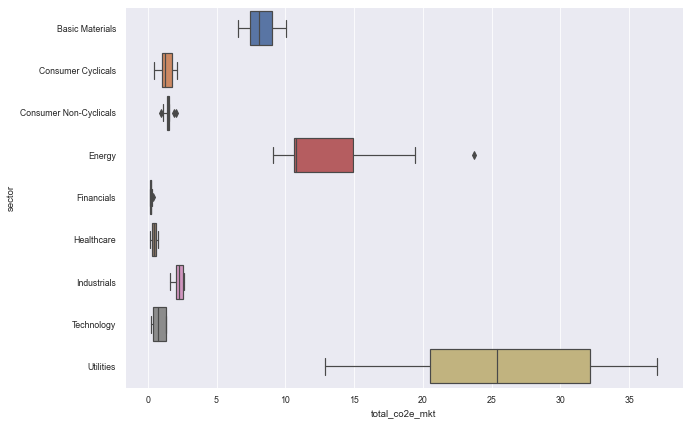

In [1088]:
#Boxplot
plt.figure(figsize=(10,7))
sns.boxplot(data=co2e_sector, y='sector', x='total_co2e_mkt')


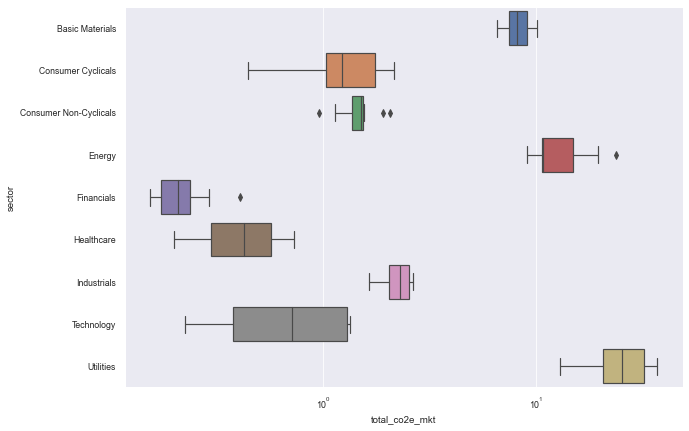

In [1089]:
#With log scale
plt.figure(figsize=(10,7))
sns.boxplot(data=co2e_sector, y='sector', x='total_co2e_mkt')
plt.xscale('log')

This is an interesting graph because the distributions vary greatly between different sectors. 

Distributions are very tight for the vast majority of sectors, in particular the weakest issuers (Financials, Technology, Healthcare & Consumers). 

High emitting sectors stand out very, very clearly, and the standard deviation is much larger.

Once again, it seems to me that this distribution mainly represent the impact of Scope 1 & 2 much more than the real impact of Scope 3, because we can roughly observe the "primary" sectors at the top of emissions, then secondary, then tertiary, where emissions directly related to the services are weak compared to resource extraction, production & distribution and then manufacturing.

**Relation between $Scope_1$, $Scope_2$ & $Scope_3$ per sector:**

**First Scope 1/3:**

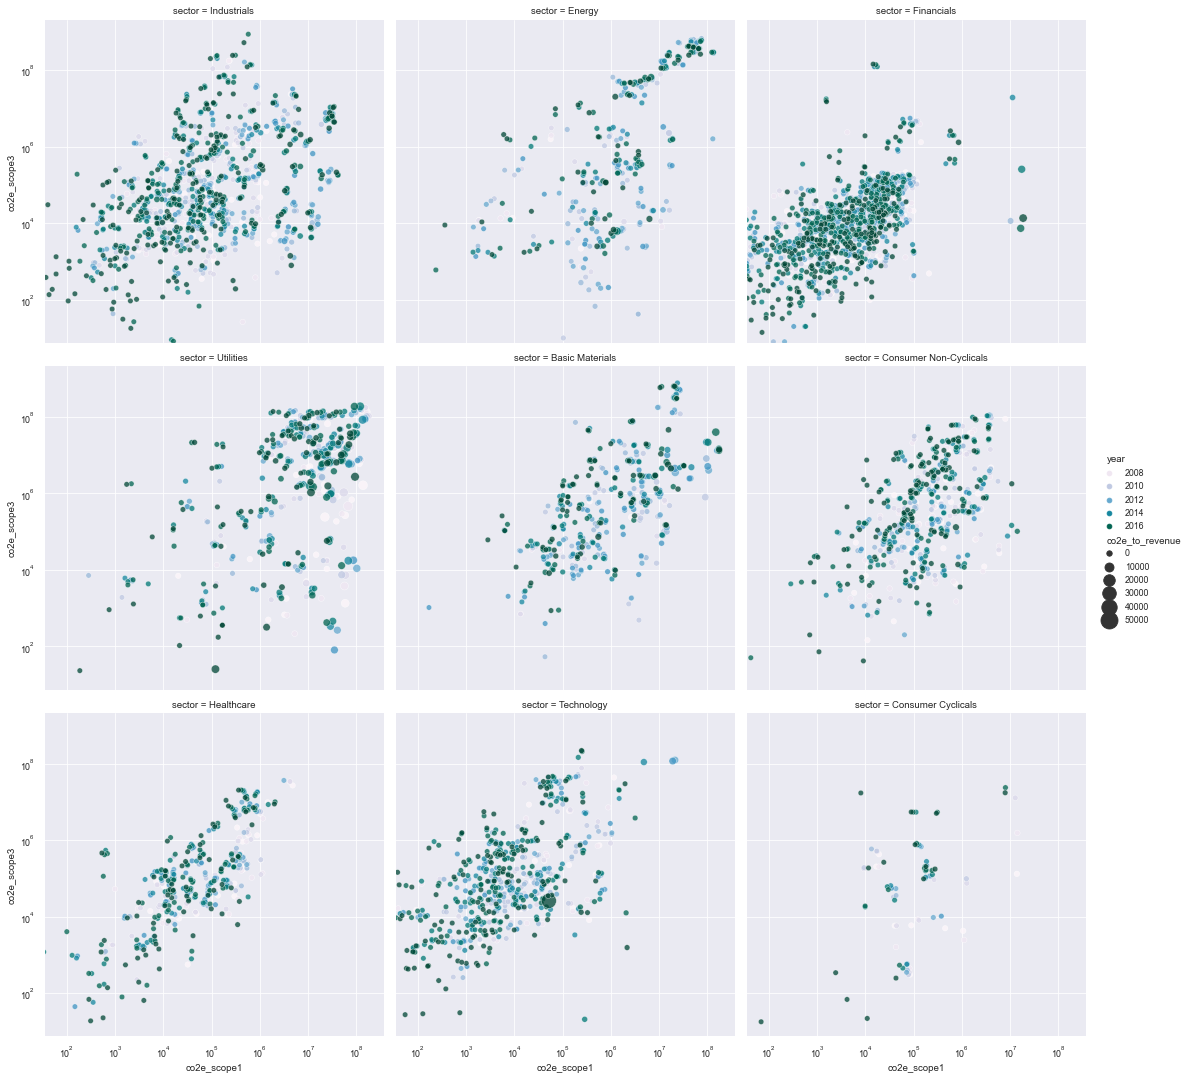

In [395]:
sns.relplot(
    data=df_carbon_disclosing, 
    x='co2e_scope1', 
    y='co2e_scope3', 
    col='sector', 
    palette='PuBuGn', 
    col_wrap=3, 
    hue='year',
    size='co2e_to_revenue',
    sizes=(30,300),
    alpha=.75
    )
plt.xscale('log')
plt.yscale('log')

We clearly see that the relation between scope 1 and 3 varies among sectors. While some sectors are close to a linear trend (Financials Healthcare, and Basic Materials for example), other setors such as Industrials does not follow the same distribution with companies that can have a scope 3 10* higher than the scope 1, or the opposition. 

Also, within an industry, we find a lot of "outliers" where the repartition scope 1/3 does not follow the sectorial trend. It may be due to an heterogeneity in calculations methods, or because we are too high in the taxonomy and need to go to the "childs" industries to find more coherent distribution.

**We can draw the same plot with scope 2/3:**

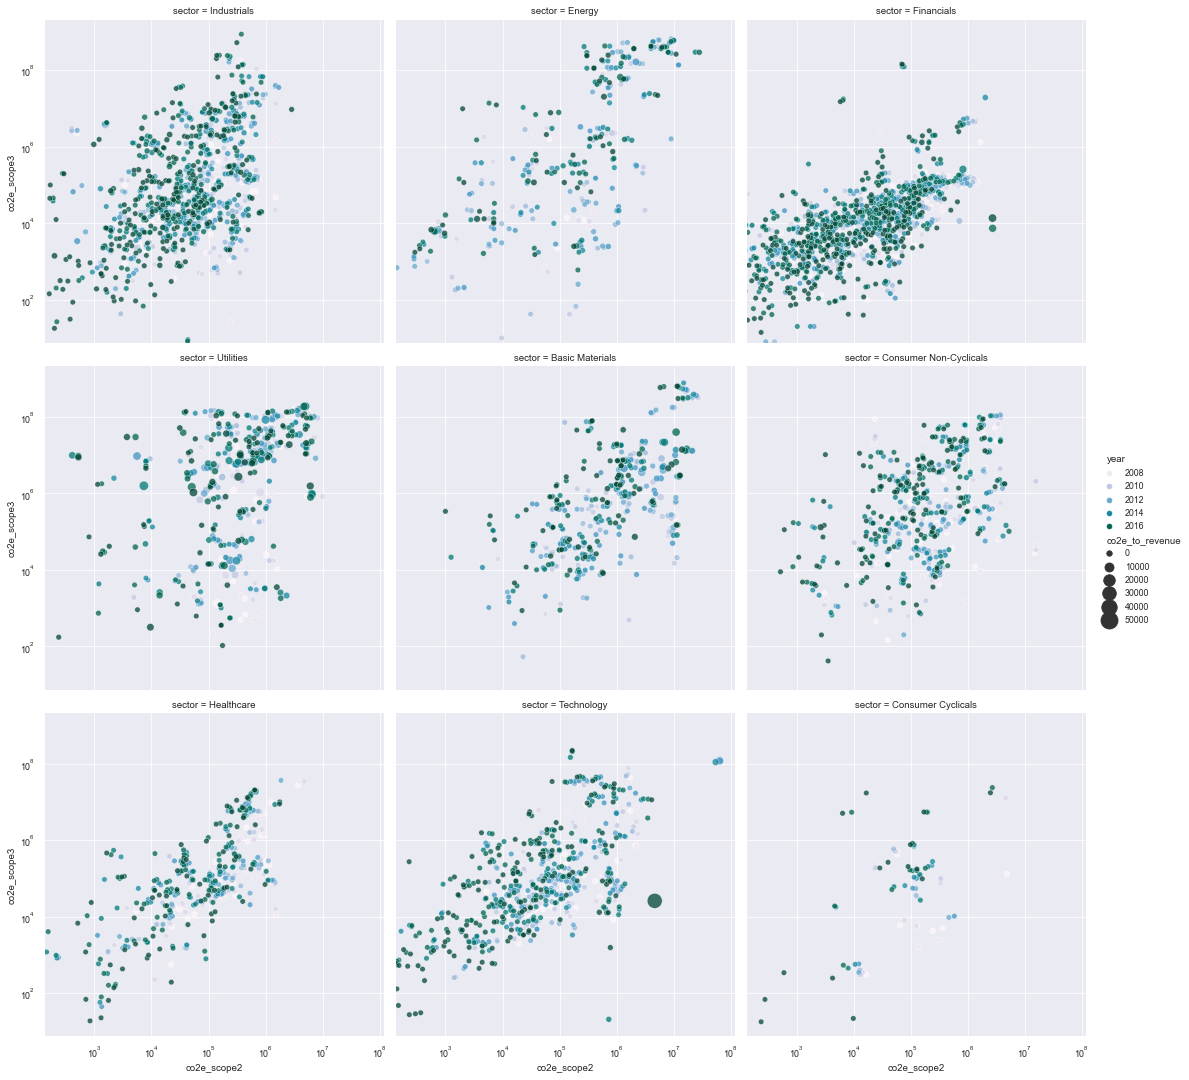

In [396]:
sns.relplot(
    data=df_carbon_disclosing, 
    x='co2e_scope2', 
    y='co2e_scope3', 
    col='sector', 
    palette='PuBuGn', 
    col_wrap=3, 
    hue='year',
    size='co2e_to_revenue',
    sizes=(30,300),
    alpha=.75
    )
plt.xscale('log')
plt.yscale('log')

Same as previously.

**Finally, Pearson Correlations:**

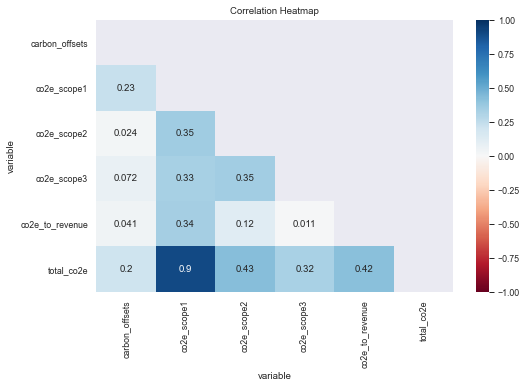

In [421]:
plot_correlations(
    df_carbon_disclosing[
    ['carbon_offsets',
    'co2e_scope1',
    'co2e_scope2',
    'co2e_scope3',
    'co2e_to_revenue',
    'total_co2e']
    ], s=(8,5))

# Part 3 - Network Analysis

### Part Description

This part is more experimental and has many limitations. 

After reading [this article](https://medium.com/analytics-vidhya/community-detection-network-analysis-of-the-stock-market-in-python-r-part-2-9b5a5dbe5d5b) several weeks ago which draws a network based on the correlations of different stocks, as well as [an example on sci-kit learn](https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html#sphx-glr-auto-examples-applications-plot-stock-market-py) which uses several machine learning methods to represent the structure of an index of market based on past performance, I wondered what it would be like to include ESG data.

We are going to use another dataset, also built from Refinitiv and composed of ~ 20K companies, with around 130 variables mainly representing environmental information (e.g. emissions, use of water, electricity, variables previously seen in part 2, CSR practices, etc.) but also several financial information (e.g. EBITDA, Net Sales, stock volatility, alpha & beta, return over 1 year & 2 years).

Most of the variables relate to the period 2017 - 2021. Unlike the previous dataset, this one contains only 13% companies that disclose CSR information.

The goal is to see how the companies are related to each other. We will therefore calculate their similarity regarding all these factors, then connect the most similar companies to each other and thus observe what logic we find and possible surprises.

*Please note that this is an exploration part, I do not pretend to master graph theory and did not spent enough time to choose carefully the data preprocessing steps, data scaling method, distance metric, and did not have the time to explore different communities detection algorithms and their implementations in python. Therefore, I do not pretend to produce a highly relevant analysis here, and all the choices I've made are possibly irrelevant for this problem.*.

The process is as follow :

1. Class companies within four categories according to their emissions : green, blue, brown, black
2. Scale the data with Standardization
3. Fill missing values with 0
4. Compute the adjacency matrix $A$ with cosine similarity
5. Convert $A$ to an edge list
6. Filter edges with a defined treshold $\lambda$
7. Build the graph $G$ with edges list
8. Draw the network with $G$
9. Analyse network structure with metrics & interactive visualisation 

To get the adjacency matrix $A$ we compute similarity between every companies in the dataset.

To compute similarity I will use cosine similarity, which is expressed as:

$Cos(C_1, C_2) = \frac{C_1 . C_2}{||C_1|| * ||C_2||}$

Where $C_1,C_2$ are two different companies. In other words, we compute the dot product of the two vectors(companies data) divided by the $L_2$ Norm of each vector.

Some used references :

[17 Distance measures - Towards Data Science](https://towardsdatascience.com/17-types-of-similarity-and-dissimilarity-measures-used-in-data-science-3eb914d2681)

[Exploring and Analyzing Network Data With Python - Programming Historian](https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python)

[Cosine Similarity - Wikipedia](https://en.wikipedia.org/wiki/Cosine_similarity)

[Python Package Documentation - Networkx](https://networkx.org/documentation/latest/index.html)

[Community Detection Algorithms - Towards Data Science](https://towardsdatascience.com/community-detection-algorithms-9bd8951e7dae)

[Network Analysis Of The Stock Market - Towards Data Science](https://medium.com/analytics-vidhya/community-detection-network-analysis-of-the-stock-market-in-python-r-part-2-9b5a5dbe5d5b)

### Load data

In [797]:
df_network = pd.read_excel('data_esg_december_updated.xlsx')

In [798]:
df_network['csr_report'] = df_network['csr_report'].fillna(0)
disclosing_count = df_network['csr_report'].loc[df_network['csr_report'] == 1].count() / df_network['csr_report'].count()
print(f'Companies with CSR disclosure: {round(disclosing_count*100, 2)}%')

Companies with CSR disclosure: 12.91%


In [799]:
df_network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Columns: 151 entries, Identifier (GRID_REPORT.RIC) to Country of Headquarters
dtypes: float64(132), int64(1), object(18)
memory usage: 22.1+ MB


In [800]:
df_network.head()

,Identifier (GRID_REPORT.RIC),Company Name,ebitda_fy0,ebitda_fy-1,ebitda_fy-2,ebitda_fy-3,ebitda_fy-4,resource_policy_fy0,resource_policy_fy-1,resource_policy_fy-2,...,weekly_alpha_2years,market_cap_fy0,market_cap_fy-1,market_cap_fy-2,TRBC Industry Name,TRBC Industry Group Name,TRBC Business Sector Name,TRBC Economic Sector Name,Country,Country of Headquarters
0,AAPL.OQ,Apple Inc,0.328670,0.281748,0.293946,0.307992,0.311913,1.0,1.0,1.0,...,27.845349,2.232279e+12,1.304765e+12,7.485391e+11,Phones & Handheld Devices,"Computers, Phones & Household Electronics",Technology Equipment,Technology,NaN,United States of America
1,HPQ.N,HP Inc,0.100808,0.083494,0.083923,0.078910,0.080855,1.0,1.0,1.0,...,12.988952,3.171216e+10,2.986300e+10,3.178450e+10,Computer Hardware,"Computers, Phones & Household Electronics",Technology Equipment,Technology,NaN,United States of America
2,CSCO.OQ,Cisco Systems Inc,0.313160,0.322610,0.315910,0.302047,0.312988,1.0,1.0,1.0,...,0.208523,1.890918e+11,2.034589e+11,1.948100e+11,Communications & Networking,Communications & Networking,Technology Equipment,Technology,NaN,United States of America
3,QCOM.OQ,Qualcomm Inc,0.338765,0.267820,0.244316,0.235947,0.259862,1.0,1.0,1.0,...,20.861946,1.722965e+11,1.007450e+11,6.898417e+10,Semiconductors,Semiconductors & Semiconductor Equipment,Technology Equipment,Technology,NaN,United States of America
4,INTC.OQ,Intel Corp,0.481988,0.480484,0.456315,0.423241,0.381683,1.0,1.0,1.0,...,-19.710638,2.041624e+11,2.603475e+11,2.141885e+11,Semiconductors,Semiconductors & Semiconductor Equipment,Technology Equipment,Technology,NaN,United States of America


### Data formatting

**Create column categories based on $CO_2e$ emissions & refinitiv environment score**

In [805]:
def env_category(x):
    x = str(x)
    if x[0] == 'A':
        return 'darkgreen'
    elif x[0] == 'B':
        return 'aqua'
    elif x[0] == 'C':
        return 'brown'
    elif x[0] == 'D':
        return 'black'
    elif x[0] == 'U':
        return 'gray'

In [806]:
df_network['environment_score_fy-1'] = df_network['environment_score_fy-1'].fillna('U')
df_network['type'] = df_network['environment_score_fy-1'].apply(lambda x: env_category(x))

In [807]:
df_network.type.value_counts()

gray         14280
black         2577
brown          953
aqua           874
darkgreen      535
Name: type, dtype: int64

In [809]:
df_network['type2'] = pd.qcut(df_network['co2e_to_revenue_fy-2'],q=4,labels=['darkgreen','aqua','brown', 'black'])
df_network.type2.value_counts()

darkgreen    468
black        467
brown        467
aqua         467
Name: type2, dtype: int64

We keep only type2 for further work.

In [811]:
df_network = df_network.dropna(subset=['co2e_to_revenue_fy-2', 'Company Name', 'ytd_return_fy0'])
df_network = df_network.drop(columns='Identifier (GRID_REPORT.RIC)')
df_network.drop_duplicates(subset=['Company Name'],inplace=True)
df_network.shape

(1861, 152)

We start with data standardization :

In [812]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_network.select_dtypes(include=[np.number])))
df_scaled.shape

(1861, 133)

Then, we fill missing values :

In [813]:
sum(df_scaled.isna().sum())

55019

In [814]:
def fill_miss(series):
    if series.dtype is pd.np.dtype(float):
        return series.fillna(0)
    elif series.dtype is pd.np.dtype(object):
        return series.fillna('.')
    else:
        return series

df_scaled = df_scaled.apply(fill_miss)

### Adjacency & edges

Now we compute cosine similarity for every company and return the adjacency matrix :

In [815]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = pd.DataFrame(cosine_similarity(df_scaled))
similarity_matrix.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860
0,1.000000,0.068772,0.427450,0.404702,0.479934,0.134262,0.572361,0.069642,0.174697,0.068435,...,-0.105895,-0.026426,-0.072180,-0.018713,-0.122056,-0.000078,-0.127782,0.071670,-0.066658,0.010765
1,0.068772,1.000000,0.565948,-0.107859,0.325696,0.237727,0.163064,0.303888,0.229767,-0.166225,...,-0.382766,-0.287874,-0.242823,-0.018262,-0.161508,0.063741,0.228906,0.391382,0.041505,-0.089080


We then create an edge list. I defined arbitrarly the treshold $\lambda = 0.7$ , in order to get a reasonable number of edges:

In [817]:
edges = similarity_matrix.copy()
edges = edges.mask(np.tril(np.ones(edges.shape)).astype(np.bool))
edges.columns=df_network['Company Name']
edges.index=df_network['Company Name']
edges.index.name = None
edges = edges[edges >= 0.7].stack().reset_index()
edges = edges.drop_duplicates(subset=['level_0', 'Company Name']).reset_index(drop=True)
edges.rename(columns={'level_0':'source', 'Company Name':'target', 0:'weight'}, inplace=True)
edges.shape

(1394, 3)

We have ~1400 edges, with various weights range $(0.7, 1)$ . The edges list looks like this:

In [818]:
edges.head(2)

,source,target,weight
0,Apple Inc,Amazon.com Inc,0.867005
1,Apple Inc,UnitedHealth Group Inc,0.725983


### Graph building & network drawing

We then create the graph $G$ using the python package networkx.
Colors are defined by carbon intensity :
- green : low 
- blue : medium-low
- brown : medium-high
- black : high

In [1090]:
import networkx as nx
import networkx.algorithms.community as nxcom
import community
import matplotlib
from pyvis.network import Network
G = nx.from_pandas_edgelist(edges, source='source', target='target', create_using=nx.Graph())
attrs = dict(zip(df_network['Company Name'], df_network.type2))
nx.set_node_attributes(G, attrs, name='color')
net = Network()
g_net = net.from_nx(G)
net.show('network_esg.html')

**You can visualize the network in an interactive way by clicking on this link (html file stored on glitch)**

**Here a static global view of the network:**

### Network description

**Info:**

In [825]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 856
Number of edges: 1394
Average degree:   3.2570


We have therefore $856$ companies represented with ~ $1400$ egdes, with an average number of connections $=3.26$

In [826]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.0038093676558998745


**Most connected companies:**

In [828]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
from operator import itemgetter
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [829]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('IG Group Holdings PLC', 23)
('HeidelbergCement AG', 18)
('Ucb SA', 16)
('Exxon Mobil Corp', 16)
('S Immo AG', 16)
('PayPoint plc', 16)
('Schweizerische Nationalbank', 16)
('Avanza Bank Holding AB', 16)
('ArcelorMittal SA', 15)
('Xcel Energy Inc', 15)
('ONE Gas Inc', 15)
('Brewin Dolphin Holdings PLC', 15)
('Hamborner REIT AG', 15)
('On The Beach Group PLC', 15)
('Bmo Global Smaller Companies PLC', 15)
('Cboe Global Markets Inc', 15)
('Intershop Holding AG', 15)
('Korn Ferry', 15)
('AES Corp', 14)
('Genco Shipping & Trading Ltd', 14)


**Get, for example, Exxon connections:**

In [841]:
edges[(edges.target == 'Exxon Mobil Corp') | (edges.source == 'Exxon Mobil Corp')]

,source,target,weight
33,Exxon Mobil Corp,HeidelbergCement AG,0.834135
34,Exxon Mobil Corp,TotalEnergies SE,0.767684
35,Exxon Mobil Corp,BP PLC,0.832146
36,Exxon Mobil Corp,Holcim AG,0.769924
37,Exxon Mobil Corp,Canadian Natural Resources Ltd,0.775906
38,Exxon Mobil Corp,Chevron Corp,0.848718
39,Exxon Mobil Corp,thyssenkrupp AG,0.740011
40,Exxon Mobil Corp,Suncor Energy Inc,0.765653
41,Exxon Mobil Corp,ArcelorMittal SA,0.918953
42,Exxon Mobil Corp,CRH PLC,0.765865


We have a lot of companies related to energy and industries.

**We can have a closer look on exxon edges data:**

In [870]:
exxon_edges = list(edges[(edges.target == 'Exxon Mobil Corp') | (edges.source == 'Exxon Mobil Corp')]['target'])
exxon_edges.append('Exxon Mobil Corp')

In [871]:
exxon_edges_data = df_network[df_network['Company Name'].isin(exxon_edges)][
    ['Company Name','Country of Headquarters', 'type2', 'TRBC Business Sector Name',
    'TRBC Economic Sector Name', '2ytd_return_fy0',
    'co2e_total_fy-2', 'emissions_target_percentage', 'emission_target_year']
    ]

In [872]:
exxon_edges_data.describe(include='all')

,Company Name,Country of Headquarters,type2,TRBC Business Sector Name,TRBC Economic Sector Name,2ytd_return_fy0,co2e_total_fy-2,emissions_target_percentage,emission_target_year
count,17,17,17,17,17,17.000000,1.700000e+01,16.000000,16.000000
unique,17,9,2,5,4,NaN,NaN,NaN,NaN
top,Exxon Mobil Corp,United States of America,black,Energy - Fossil Fuels,Energy,NaN,NaN,NaN,NaN
freq,1,5,16,7,7,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,-0.050641,6.900570e+07,27.187500,2027.250000
std,NaN,NaN,NaN,NaN,NaN,0.330354,4.948618e+07,14.869292,3.396076
min,NaN,NaN,NaN,NaN,NaN,-0.452447,1.759640e+07,2.000000,2021.000000
25%,NaN,NaN,NaN,NaN,NaN,-0.363958,2.510000e+07,18.750000,2025.000000
50%,NaN,NaN,NaN,NaN,NaN,-0.095910,5.420000e+07,27.500000,2030.000000
75%,NaN,NaN,NaN,NaN,NaN,0.195566,1.050650e+08,30.750000,2030.000000


We have 4 differents sectors, with various stock returns and emissions targets. The range for total emissions is however relatively close and 16 companies on the 17 total edges are "black" regarding emissions. All have setted a target to reduce emissions.

**Finally, stock return and $CO_2e$ :**

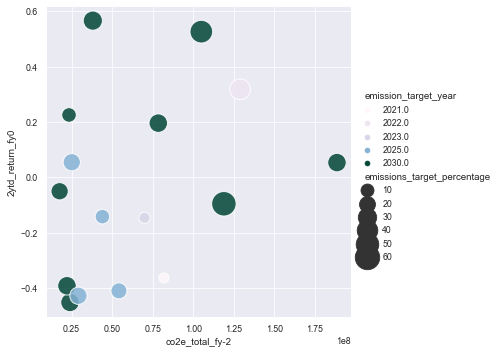

In [873]:
sns.relplot(
    data=exxon_edges_data, 
    x='co2e_total_fy-2', y='2ytd_return_fy0', 
    hue='emission_target_year', size='emissions_target_percentage', 
    palette='PuBuGn', sizes=(100,600), alpha=.85)

### Unfortunatly I do not have enough time to explore more the network and try to identify communities for this project. Thanks for reading!